<a href="https://colab.research.google.com/github/shauryasachdev/Deep-Learning/blob/main/BackPropogation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Defining and initializing the input and ouput for the neural network

X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]]).T
d = np.array([0, 1, 1, 0])
print(X)
print(d)

[[0 0 1 1]
 [0 1 0 1]]
[0 1 1 0]


In [ ]:
# Defining initializing the network parameters

def initialize_network_parameters():
  input_size = 2      # no. of input neurons
  hidden_size = 2     # no. of hidden neurons
  output_size = 1     # no. of output neurons

  lr = 0.1            # learning rate
  epochs = 180000       # no. of epochs/iterations

  # initialize weights and biases randonmly within the range [-1, 1]

  w1 = np.random.rand(hidden_size, input_size) * 2 - 1      # Weights from input to hidden layer
  b1 = np.random.rand(hidden_size, 1) * 2 - 1                  # Bias for hidden layer
  w2 = np.random.rand(output_size, hidden_size) * 2 - 1     # Weights from hidden to output layer
  b2 = np.random.rand(output_size, 1) * 2 - 1               # Bias for output layer

  return w1, b1, w2, b2, lr, epochs

print(X)
print(w1)
print(b1)
print(w2)
print(b2)

[[0 0 1 1]
 [0 1 0 1]]
[[-0.86250543 -0.05358734]
 [-0.38282318  0.68068944]]
[[0.09919423]
 [0.7008706 ]]
[[-0.87283757 -0.67177093]]
[[-0.61183034]]


In [ ]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()
#print(X, w1, b1, w2, b2, lr, epochs)

error_list = []

for epoch in range(epochs):
  # Forward Pass
  z1 = np.dot(w1, X) + b1         # (Weighted Sum) dot product of w1 [2, 2] with X [2, 4] => z1 [2, 4]
  a1 = 1/(1 + np.exp(-z1))

  z2 = np.dot(w2, a1) + b2        # (Weighted Sum) dot product of w2 [1, 2] with a1 [2, 4] => z2 [1, 4]
  a2 =  1/(1 + np.exp(-z2))

  # Error propogation and Backward Pass
  error = d - a2

  # Gradients for the output layer
  # d_error/d_z2 = -(d - a2) * a2 * (1 - a2)
  delta2 = -error * a2 * (1 - a2)

  # Update w2 and b2
  # d_error/d_w2 = delta2 @ a1.T
  w2 = w2 - lr * np.dot(delta2, a1.T)

  # d_error/d_b2 = sum(delta2, axis=1, keepdims=True)
  b2 = b2 - lr * np.sum(delta2, axis=1, keepdims=True)

  # Gradients for the hidden layer
  # d_error/d_z1 = (w2.T @ delta2) * a1 * (1 - a1)
  # Note: w2 is (1,2), delta2 is (1,4). w2.T is (2,1). (w2.T @ delta2) is (2,1) @ (1,4) = (2,4)
  delta1 = np.dot(w2.T, delta2) * a1 * (1 - a1) # Element-wise product for sigmoid derivative

  # Update w1 and b1
  # d_error/d_w1 = delta1 @ X.T
  w1 = w1 - lr * np.dot(delta1, X.T)

  # d_error/d_b1 = sum(delta1, axis=1, keepdims=True)
  b1 = b1 - lr * np.sum(delta1, axis=1, keepdims=True)

  if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


Epoch: 9999, Average error: 0.15237
Epoch: 19999, Average error: 0.03705
Epoch: 29999, Average error: 0.02586
Epoch: 39999, Average error: 0.02092
Epoch: 49999, Average error: 0.01800
Epoch: 59999, Average error: 0.01602
Epoch: 69999, Average error: 0.01457
Epoch: 79999, Average error: 0.01344
Epoch: 89999, Average error: 0.01254
Epoch: 99999, Average error: 0.01180
Epoch: 109999, Average error: 0.01117
Epoch: 119999, Average error: 0.01063
Epoch: 129999, Average error: 0.01017
Epoch: 139999, Average error: 0.00975
Epoch: 149999, Average error: 0.00939
Epoch: 159999, Average error: 0.00906
Epoch: 169999, Average error: 0.00876
Epoch: 179999, Average error: 0.00849


Final output after training: [[0.00850859 0.9902382  0.99193042 0.00762809]]
Ground truth [0 1 1 0]
Error after training: [[-0.00850862  0.00976182  0.00806961 -0.00762811]]
Average error: 0.00849


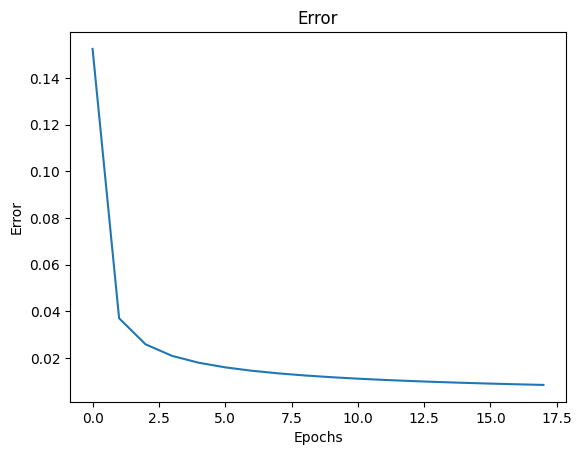

In [ ]:
# Testing the trained model

z1 =  np.dot(w1, X) + b1
a1 = 1 / (1 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()